## Проект: прогноз цен на недвижимость

### Алгоритм 
1. Импорт библиотек
2. Загрузка файлов (train.csv, text.csv)
3. Анализ датасетов, количество наблюдений и признаков
4. Анализ датасета test_df (тестовый датасет)
4. Разбиение train (обучающий) на train  и valid
5. Распределение целевой переменной (визуализация) (y_train)
6. работа с X_train: 
   тип признаков, пропуски,
   описательные статистики
7. Работа с X_train: анализ переменных
   1. Идентификационный номер района (DistrictId)
   2. Количество комнат(Rooms)
   3. Площадь (Square), жилая площадь (LifeSquare), площадь кухни (KitchenSquare)
   4. Этаж (Floor), количество этажей в доме (HouseFloor)
   5. Год постройки (HouseYear)
   6. Экология ('Ecology', 1, 2, 3)
   7. Социальные показатели('Social', 1, 2, 3)
   8. Охрана здоровья('Healthcare_1', 'Helthcare_2')
   9. Магазины('Shops_1, Shops_2)
8. Построение модели "случайный лес"
   1. обучение
   2. предсказание
   3. расчет R^2
9. Cохранение результата
   
   

количество строк и столбцов в датасетах
train: (10000, 20)
test: (5000, 19)

информация о датасете test_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   f

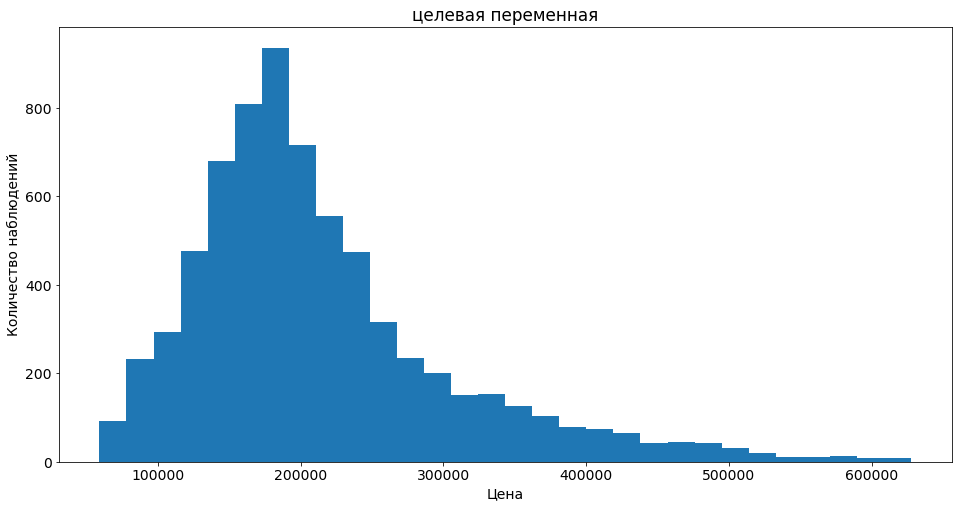

Резких выбросов нет
Работа с X_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7000 non-null   int64  
 1   DistrictId     7000 non-null   int64  
 2   Rooms          7000 non-null   float64
 3   Square         7000 non-null   float64
 4   LifeSquare     5504 non-null   float64
 5   KitchenSquare  7000 non-null   float64
 6   Floor          7000 non-null   int64  
 7   HouseFloor     7000 non-null   float64
 8   HouseYear      7000 non-null   int64  
 9   Ecology_1      7000 non-null   float64
 10  Ecology_2      7000 non-null   object 
 11  Ecology_3      7000 non-null   object 
 12  Social_1       7000 non-null   int64  
 13  Social_2       7000 non-null   int64  
 14  Social_3       7000 non-null   int64  
 15  Healthcare_1   3598 non-null   float64
 16  Helthcare_2    7000 non-null   int64  
 17  Shops_1    

In [1]:
%%time
# Импорт библиотек
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats 
from sklearn.metrics import r2_score


# Загрузка файлов
TRAIN_DATASET_PATH = 'D:/Алевтина/geekbrains_обучение/4. Библиотеки Python для Data Science Numpy, Matplotlib, Scikit-learn/ПРОЕКТ/train.csv' 
TEST_DATASET_PATH = 'D:/Алевтина/geekbrains_обучение/4. Библиотеки Python для Data Science Numpy, Matplotlib, Scikit-learn/ПРОЕКТ/test.csv'
RESULT_DATASET_PATH = 'D:/Алевтина/geekbrains_обучение/4. Библиотеки Python для Data Science Numpy, Matplotlib, Scikit-learn/ПРОЕКТ/sample_submission.csv'

# считываем датасеты в переменные
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)


# запрашиваем информацию о количестве строк и столбцов в датасетах
print("количество строк и столбцов в датасетах")
print(f'train: {train_df.shape}')
print(f'test: {test_df.shape}')
print()

# информация о датасете test_df
print('информация о датасете test_df:')
test_df.info()
print()
print('Признаки LifeSquare и Healthcare_1 имеют пропуски значений')
print()

# список столбцов в трейн
print("список столбцов в трейн:")
print(train_df.columns)
print()

# разбиваем train_df на два датасета: трейн и валид
X = pd.DataFrame(train_df.drop(["Price"], axis=1))
y = pd.DataFrame(train_df['Price'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Распределение целевой переменной 
print('Распределение целевой переменной (y_train)')
plt.figure(figsize = (16, 8))
plt.hist(y_train, bins=30)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.title('целевая переменная')
plt.show()
print('Резких выбросов нет')

# получаем информацию о X_train: тип признаков, количество пропусков, описательная статистика
print('Работа с X_train:')
X_train.info()
print()
print('Признаки LifeSquare и Healthcare_1 имеют пропуски значений (как и в тестовом датасете)')
print()

# Идентификационный номер района (DistrictId)
print("Идентификационный номер района (DistrictId): пропусков нет")
print(X_train['DistrictId'].describe())
print()

# Количество комнат (Rooms)
print("Количество комнат (Rooms): пропусков нет")
print(X_train['Rooms'].describe())
print()
print(X_train['Rooms'].value_counts())
print()
# признак Rooms: значения 0 и >5 заменяем на медиану"
X_train.loc[(X_train['Rooms'] == 0) | (X_train['Rooms'] > 5), 'Rooms'] = int(X_train['Rooms'].median())
print()

# такое преобразование проводим для X_valid и test_df, медиану берем из X_train
X_valid.loc[(X_valid['Rooms'] == 0) | (X_valid['Rooms'] > 5), 'Rooms'] = int(X_train['Rooms'].median())
test_df.loc[(test_df['Rooms'] == 0) | (test_df['Rooms'] > 5), 'Rooms'] = int(X_train['Rooms'].median())
print()

# Площадь (Square), жилая площадь (LifeSquare), площадь кухни (KitchenSquare)
print('Площадь (Square) пропусков нет') 
print('жилая площадь (LifeSquare) ЕСТЬ пропуски')
print('площадь кухни (KitchenSquare) пропусков нет')
print()
print(X_train[['Square', 'LifeSquare', 'KitchenSquare']].describe())

# замена значений "Square" < 13 и > 190 на медиану
X_train.loc[(X_train['Square'] < 13) | (X_train['Square'] > 190), 'Square'] = int(X_train['Square'].median())

# замена значений "LifeSquare" < 13 и > 162 на медиану
X_train.loc[(X_train['LifeSquare'] < 13) | (X_train['LifeSquare'] > 162), 'LifeSquare'] = int(X_train['LifeSquare'].median())

# замена значений "KitchenSquare" > 28 
X_train.loc[(X_train['KitchenSquare'] > 28) & ((X_train['Square'] - X_train['LifeSquare'] -\
X_train['KitchenSquare']) < 0), 'KitchenSquare'] = int(X_train['LifeSquare'].median())

# замена пропусков в LifeSquare: Square - KitchenSquare - median(Square-LifeSquare-KitchenSquare)
square_diff = (X_train.loc[X_train['Square'].notnull(), 'Square'] - X_train.loc[X_train['LifeSquare'].notnull(), 'LifeSquare'] -\
X_train.loc[X_train['KitchenSquare'].notnull(), 'KitchenSquare']).median()
X_train.loc[X_train['LifeSquare'].isnull(), 'LifeSquare'] = X_train.loc[X_train['LifeSquare'].isnull(), 'Square'] -\
X_train.loc[X_train['LifeSquare'].isnull(), 'KitchenSquare'] - square_diff

# такое преобразование проводим для X_valid и test_df, медиану берем из X_train
X_valid.loc[(X_valid['Square'] < 13) | (X_valid['Square'] > 190), 'Square'] = int(X_train['Square'].median())
test_df.loc[(test_df['Square'] < 13) | (test_df['Square'] > 190), 'Square'] = int(X_train['Square'].median())

X_valid.loc[(X_valid['LifeSquare'] < 13) | (X_valid['LifeSquare'] > 162), 'LifeSquare'] = int(X_train['LifeSquare'].median())
test_df.loc[(test_df['LifeSquare'] < 13) | (test_df['LifeSquare'] > 162), 'LifeSquare'] = int(X_train['LifeSquare'].median())

X_valid.loc[(X_valid['KitchenSquare'] > 28) & ((X_valid['Square'] - X_valid['LifeSquare'] -\
X_valid['KitchenSquare']) < 0), 'KitchenSquare'] = int(X_train['LifeSquare'].median())
test_df.loc[(test_df['KitchenSquare'] > 28) & ((test_df['Square'] - test_df['LifeSquare'] -\
test_df['KitchenSquare']) < 0), 'KitchenSquare'] = int(X_train['LifeSquare'].median())

X_valid.loc[X_valid['LifeSquare'].isnull(), 'LifeSquare'] = X_valid.loc[X_valid['LifeSquare'].isnull(), 'Square'] -\
X_valid.loc[X_valid['LifeSquare'].isnull(), 'KitchenSquare'] - square_diff
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] - square_diff

# Этаж (Floor), количество этажей в доме (HouseFloor)
print('Floor: пропусков нет')
print('HouseFloor: пропусков нет')
print(X_train[['Floor', 'HouseFloor']].describe())

# заменим в 'HouseFloor' значения 0 на медиану  в трех датасетах
X_train.loc[X_train['HouseFloor'] == 0, 'HouseFloor'] = X_train['HouseFloor'].median()
X_valid.loc[X_valid['HouseFloor'] == 0, 'HouseFloor'] = X_train['HouseFloor'].median()
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = X_train['HouseFloor'].median()

# Обновляю индекс в X_train
X_train.reset_index(inplace=True)
print()

# замена значений в 'Floor', если больше, чем в 'HouseFloor'
for i in X_train.index:    
    if X_train['Floor'].loc[X_train.index[i]] > X_train['HouseFloor'].loc[X_train.index[i]]:
        X_train['Floor'].loc[X_train.index[i]], X_train['HouseFloor'].loc[X_train.index[i]] =\
        X_train['HouseFloor'].loc[X_train.index[i]], X_train['Floor'].loc[X_train.index[i]]
# присваиваем X_train.index исходные значения
X_train.index = X_train['index']
X_train.drop(['index'], axis=1, inplace=True)

# преобразуем valid и test_df по Floor , HouseFloor
X_valid.reset_index(inplace=True)
for i in X_valid.index:    
    if X_valid['Floor'].loc[X_valid.index[i]] > X_valid['HouseFloor'].loc[X_valid.index[i]]:
        X_valid['Floor'].loc[X_valid.index[i]], X_valid['HouseFloor'].loc[X_valid.index[i]] =\
        X_valid['HouseFloor'].loc[X_valid.index[i]], X_valid['Floor'].loc[X_valid.index[i]]
X_valid.index = X_valid['index']
X_valid.drop(['index'], axis=1, inplace=True)

test_df.reset_index(inplace=True)
for i in test_df.index:    
    if test_df['Floor'].loc[test_df.index[i]] > test_df['HouseFloor'].loc[test_df.index[i]]:
        test_df['Floor'].loc[test_df.index[i]], test_df['HouseFloor'].loc[test_df.index[i]] =\
        test_df['HouseFloor'].loc[test_df.index[i]], test_df['Floor'].loc[test_df.index[i]]
test_df.index = test_df['index']
test_df.drop(['index'], axis=1, inplace=True)
print()

# Год постройки (HouseYear)
print('Год постройки (HouseYear): пропусков нет')
print(X_train['HouseYear'].describe())
X_train.loc[X_train['HouseYear'] > 2022, 'HouseYear'] = int(X_train['HouseYear'].median())
X_valid.loc[X_valid['HouseYear'] > 2022, 'HouseYear'] = int(X_train['HouseYear'].median())
test_df.loc[test_df['HouseYear'] > 2022, 'HouseYear'] = int(X_train['HouseYear'].median())
print()

# Экология ('Ecology', 1, 2, 3)
print('Экология ("Ecology", 1, 2, 3): пропусков нет')
print()
print(X_train['Ecology_2'].value_counts())
print(X_train['Ecology_3'].value_counts())

# заменим А на 0, В на 1 в трех датасетах
X_train.loc[X_train['Ecology_2'] == 'A', 'Ecology_2'] = 0
X_train.loc[X_train['Ecology_2'] == 'B', 'Ecology_2'] = 1
X_train.loc[X_train['Ecology_3'] == 'A', 'Ecology_3'] = 0
X_train.loc[X_train['Ecology_3'] == 'B', 'Ecology_3'] = 1
X_train['Ecology_2'] = X_train['Ecology_2'].astype(int)
X_train['Ecology_3'] = X_train['Ecology_3'].astype(int)

X_valid.loc[X_valid['Ecology_2'] == 'A', 'Ecology_2'] = 0
X_valid.loc[X_valid['Ecology_2'] == 'B', 'Ecology_2'] = 1
X_valid.loc[X_valid['Ecology_3'] == 'A', 'Ecology_3'] = 0
X_valid.loc[X_valid['Ecology_3'] == 'B', 'Ecology_3'] = 1
X_valid['Ecology_2'] = X_valid['Ecology_2'].astype(int)
X_valid['Ecology_3'] = X_valid['Ecology_3'].astype(int)

test_df.loc[test_df['Ecology_2'] == 'A', 'Ecology_2'] = 0
test_df.loc[test_df['Ecology_2'] == 'B', 'Ecology_2'] = 1
test_df.loc[test_df['Ecology_3'] == 'A', 'Ecology_3'] = 0
test_df.loc[test_df['Ecology_3'] == 'B', 'Ecology_3'] = 1
test_df['Ecology_2'] = test_df['Ecology_2'].astype(int)
test_df['Ecology_3'] = test_df['Ecology_3'].astype(int)
print()

#Социальные показатели('Social', 1, 2, 3)
print('Социальные показатели("Social", 1, 2, 3): без пропусков')
X_train[['Social_1', 'Social_2', 'Social_3']].describe()

# Охрана здоровья('Healthcare_1', 'Helthcare_2')
print('Healthcare_1: ЕСТЬ пропуски')
print()
X_train[['Healthcare_1', 'Helthcare_2']].describe()
# замена пропусков на медиану
X_train.loc[X_train['Healthcare_1'].isnull(), 'Healthcare_1'] = int(X_train['Healthcare_1'].median())
X_valid.loc[X_valid['Healthcare_1'].isnull(), 'Healthcare_1'] = int(X_train['Healthcare_1'].median())
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = int(X_train['Healthcare_1'].median())
print()

# Магазины('Shops_1, Shops_2)
print('Магазины(Shops_1, Shops_2): пропусков нет')
print()
print(X_train['Shops_1'].describe())
print(X_train['Shops_2'].value_counts())

# заменим А на 0, В на 1 в трех датасетах для 'Shop_2'
X_train['Shops_2'] = X_train['Shops_2'].replace({'A':0, 'B':1})
X_valid['Shops_2'] = X_valid['Shops_2'].replace({'A':0, 'B':1})
test_df['Shops_2'] = test_df['Shops_2'].replace({'A':0, 'B':1})
print()

# информация о датасете после преобразований
print('информация о датасете после преобразований')
print(X_train.info())
print()

# корреляция между таргетной переменной и предикторами
print('корреляция между таргетной переменной и предикторами')
print('расчет коэффициента корреляции (r) и уровня значимости (p-value)')
print()
for i in X_train.columns:
    r, p = stats.pearsonr(X_train[i], y_train['Price'])
    print(f'[{i} : r = {np.round(r, 4)}, p = {np.round(p, 4)}')

# создаем список признаков, для построения модели, на трех датасетах
feature_new = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
               'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
               'Social_1', 'Social_2', 'Social_3',
               'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2',
               'DistrictId']
X_train = X_train[feature_new]
X_valid = X_valid[feature_new]
test_df = test_df[feature_new]

# Построение модели 'случайный лес'

model = RandomForestRegressor(n_estimators = 1000, max_features = 13, random_state = 42)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(test_df)

# оценка качества модели: r-score

print('оценка качества модели: r-score')
R2_valid = r2_score(y_valid, y_valid_pred)
R2_train = r2_score(y_train, y_train_pred)
print(f'Коэффициент множественной детерминации (R2) для valid = {round(R2_valid, 2)}')
print(f'Коэффициент множественной детерминации (R2) для train = {round(R2_train, 2)}')
print()

# сохранение результатов прогноза

submit = pd.read_csv(RESULT_DATASET_PATH)
submit.drop(['Price'], axis=1)
submit['Price'] = y_test_pred
submit.to_csv('D:/Алевтина/geekbrains_обучение/4. Библиотеки Python для Data Science Numpy, Matplotlib, Scikit-learn/ПРОЕКТ/sample_submission_GoncharovaAV.csv', index=False)

